In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#READING DATA and saving in DataFrame
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

The data has 1599 rows and 12 columns.

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

The 12 column names such as: fixed acidity, volatile acidity, citric acid etc are shown above.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the values are non null in all the columns. Quality column is integer type and rest all are float type.

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Hence all the columns has zero null values so the sum of all null values in individual columns are zero

<AxesSubplot: >

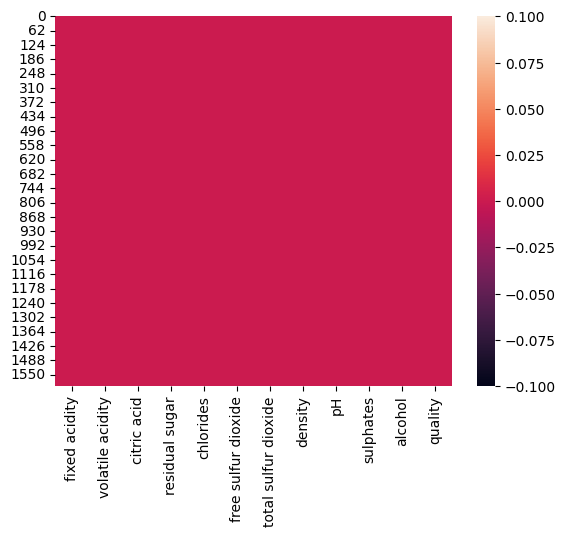

In [7]:
#lets visualize non null using heatmap
#Since the non values are zero so heatmap will also show that the non values are zero.
sns.heatmap(df.isnull())

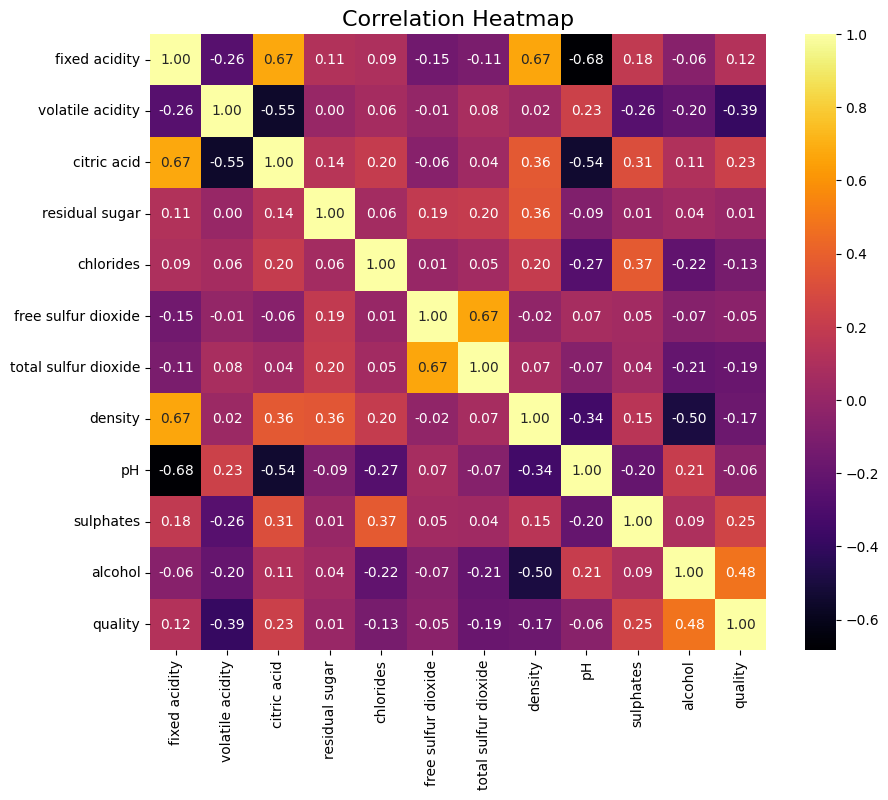

In [8]:
plt.figure(figsize=(10, 8))
corr = df.corr()
cmap = sns.color_palette("inferno", as_cmap=True)  
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", square=True)  # Add annotations
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

The strongly correlated items are : 1.fixed acidity and citric acid. 2.free sulfur dioxide and total sulfur dioxide. 3.fixed acidity and density. 4. alcohol and quality.So, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.
The weekly correlated items are :1.citric acid and volatile acidity. 2.fixed acidity and ph. 3.density and alcohol.

Further EDA is done to show the above correlations.


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Column wise mean, standard deviation and all the quantiles of the winequality dataset is clearly mentioned above. The data has 1599 counts column wise in each category. From fixed acidity to alcohol seems to be features for defining the quality of wine. So, quality is considered target variable and remaining all columns are features.

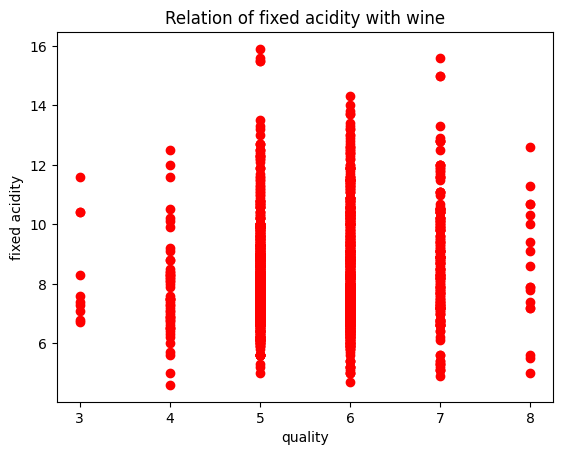

In [10]:
# checking the variation of fixed acidity in the different qualities of wine
plt.scatter(df['quality'], df['fixed acidity'], color = 'red')
plt.title('Relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

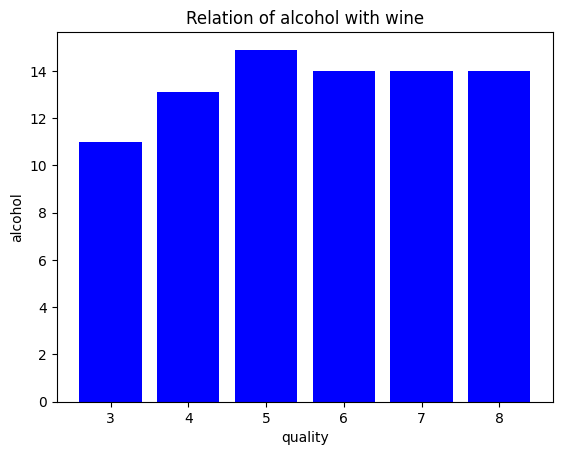

In [11]:
# checking the variation of alcohol in the different qualities of wine
plt.bar(df['quality'], df['alcohol'], color = 'blue')
plt.title('Relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

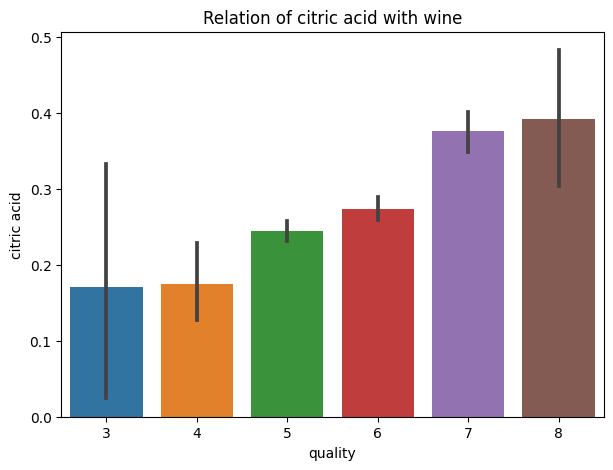

In [12]:
# Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'citric acid', data = df)
plt.title('Relation of citric acid with wine')
plt.show()

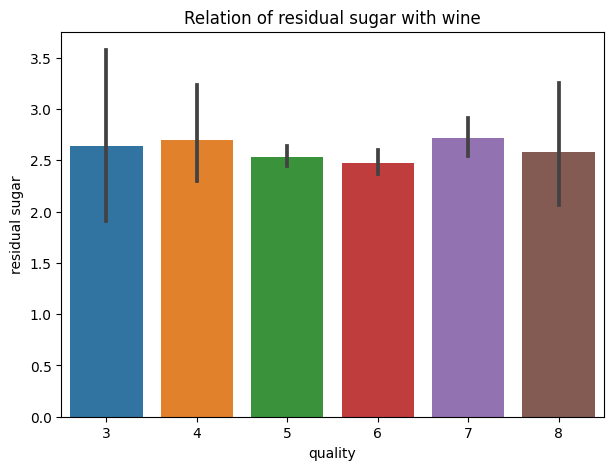

In [13]:
#Comparing residual sugar with quality of wine
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)
plt.title('Relation of residual sugar with wine')
plt.show()

Similarly we can have multiple plots for features and target variable. So to sum up the above EDA below function is made.

In [14]:
# Function to create a histogram, and a boxplot and scatter plot.
def exploratory_analysis(df, variable,target):
    # The function takes a dataframe (df) and the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'b')
   
    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'r')
 
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'g')
        
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    
    plt.show()

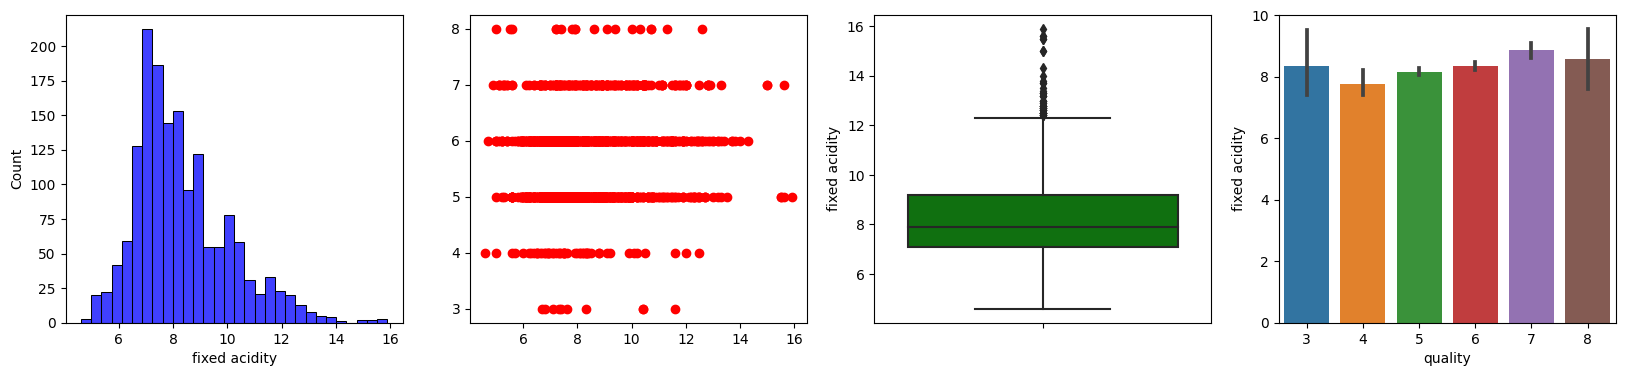

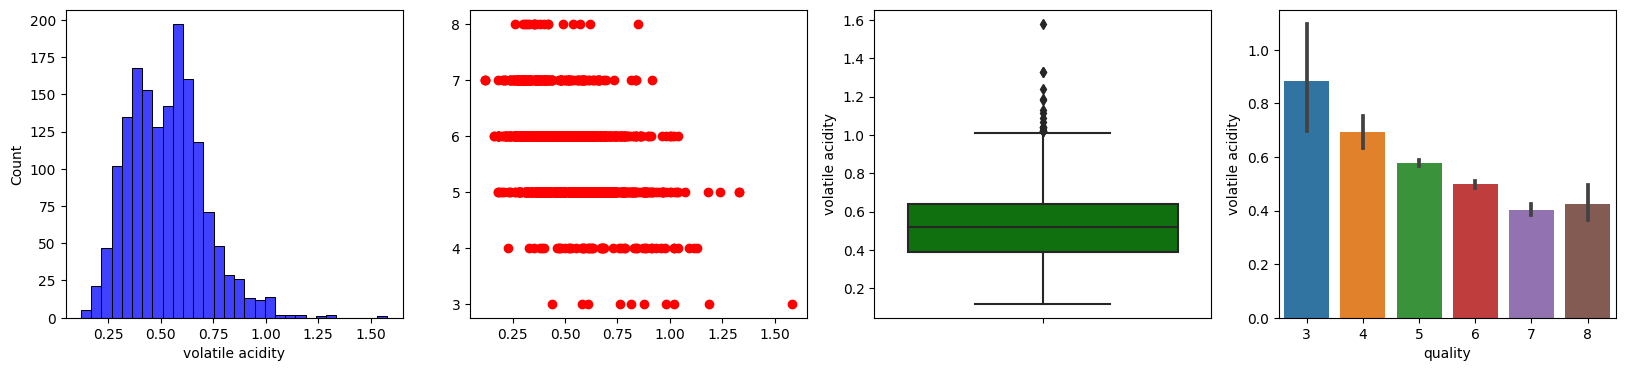

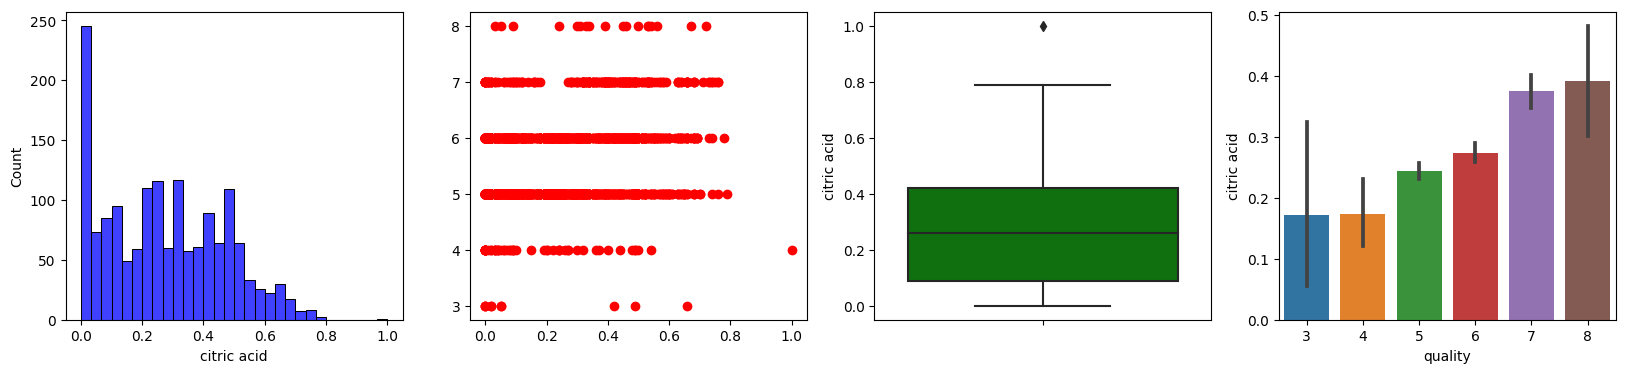

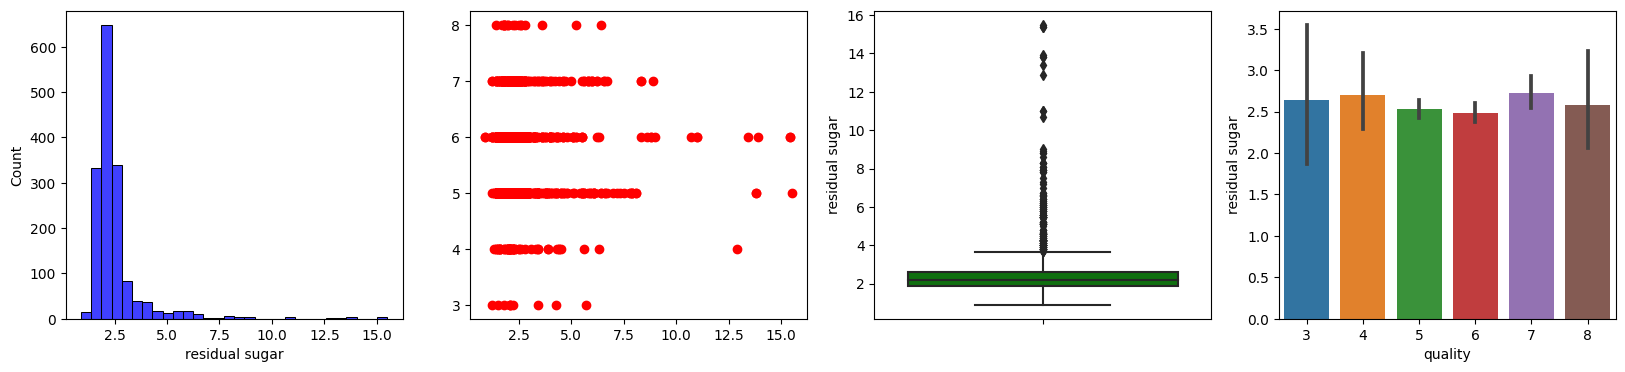

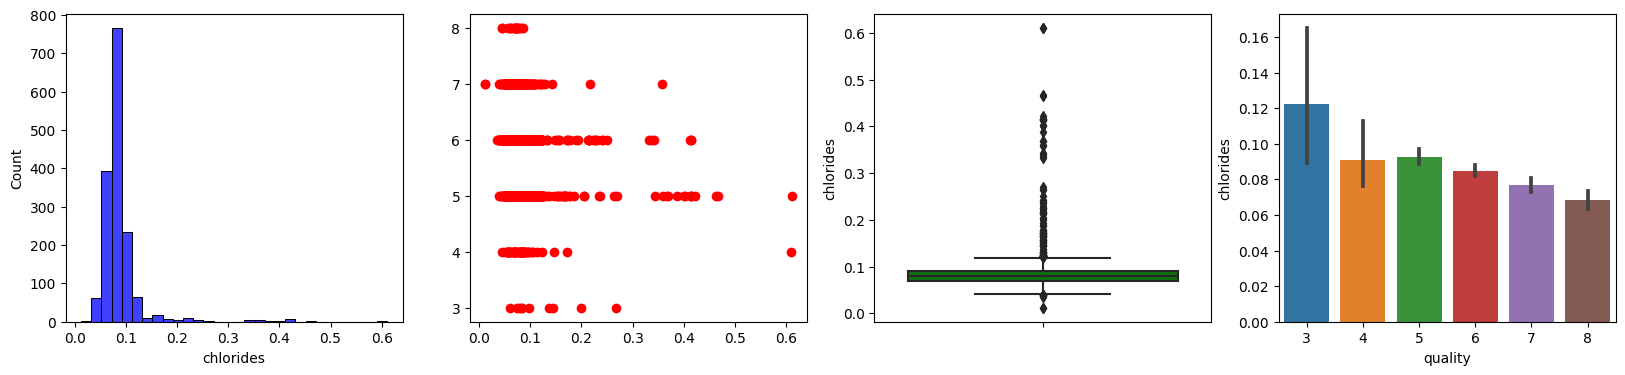

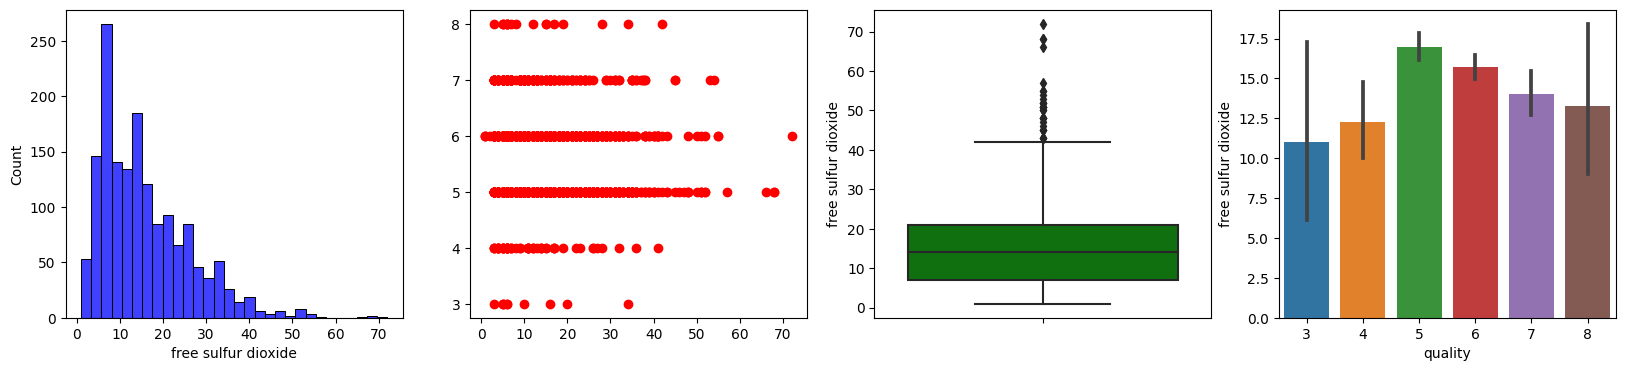

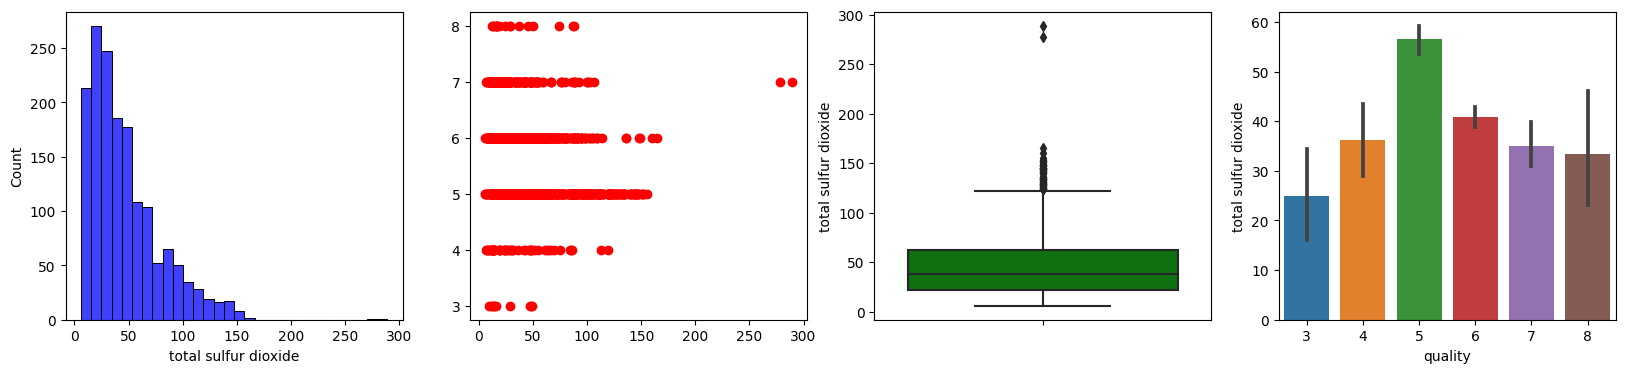

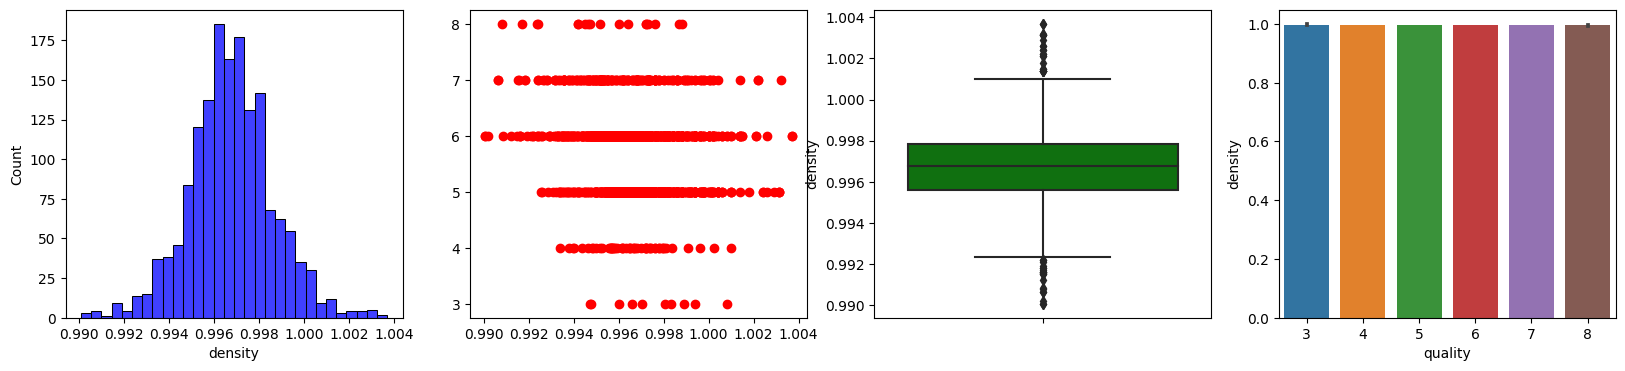

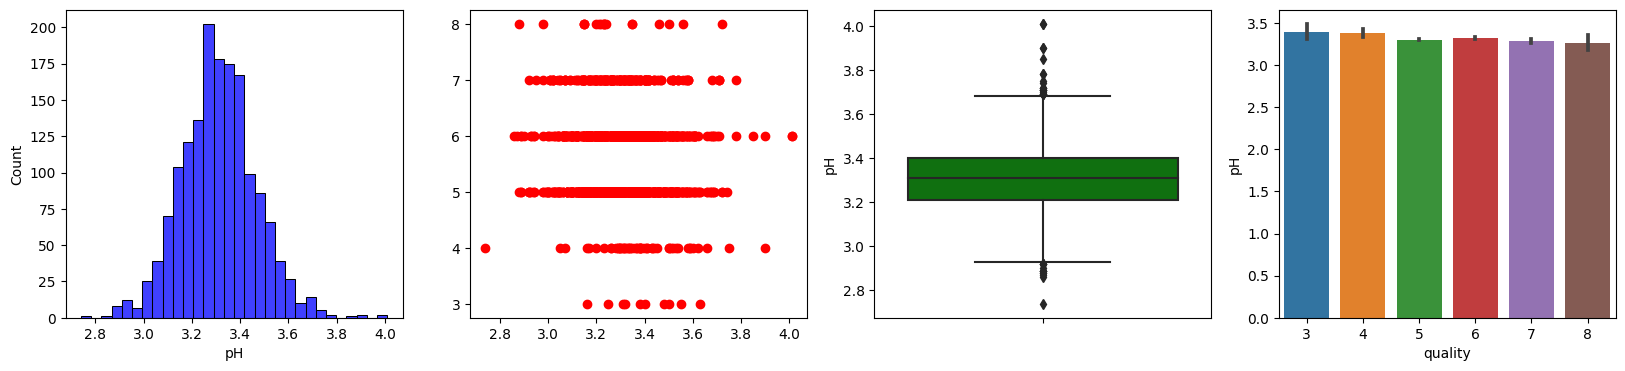

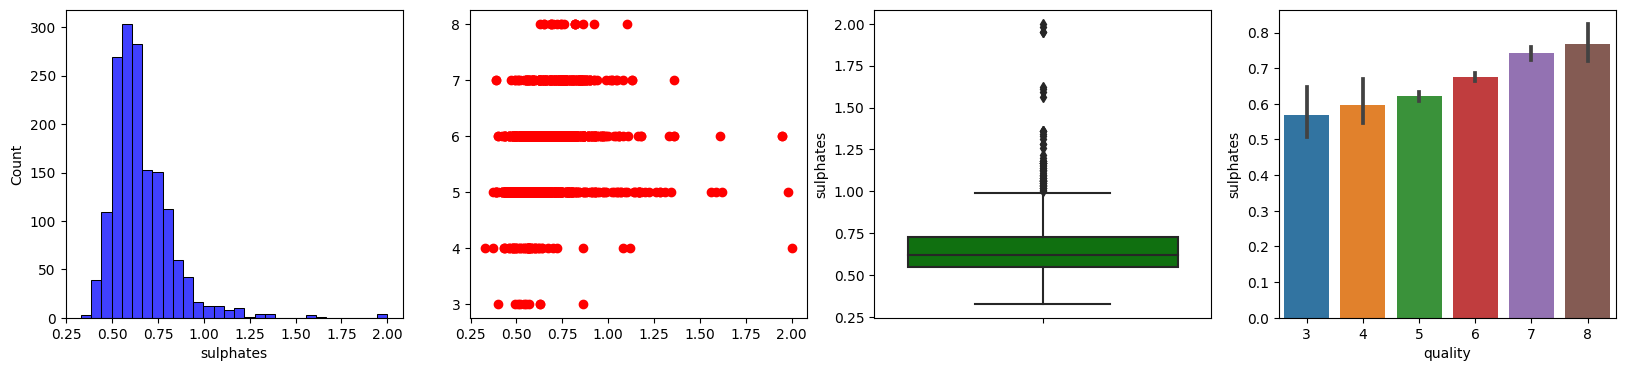

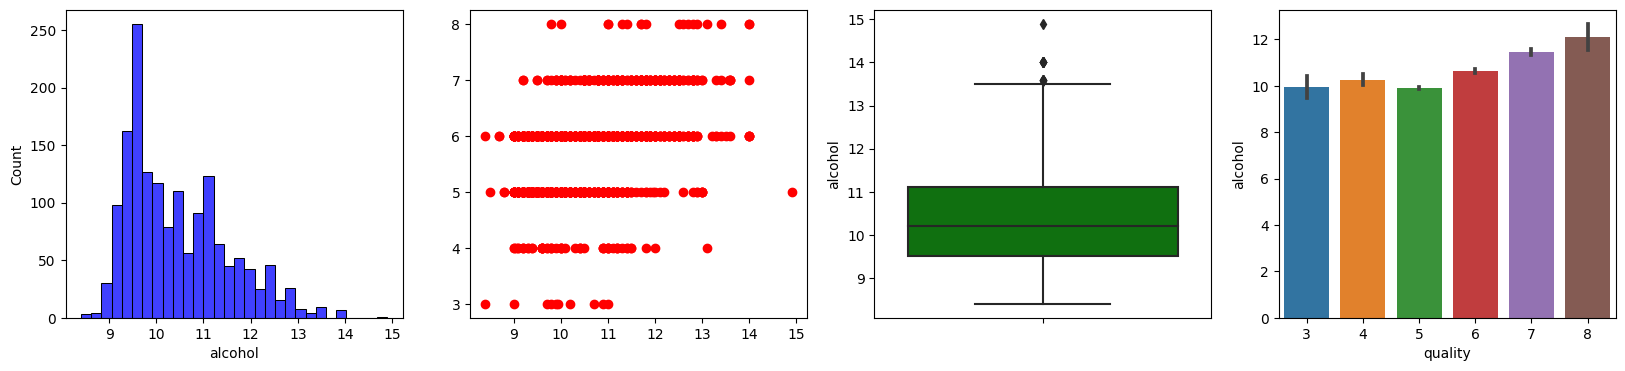

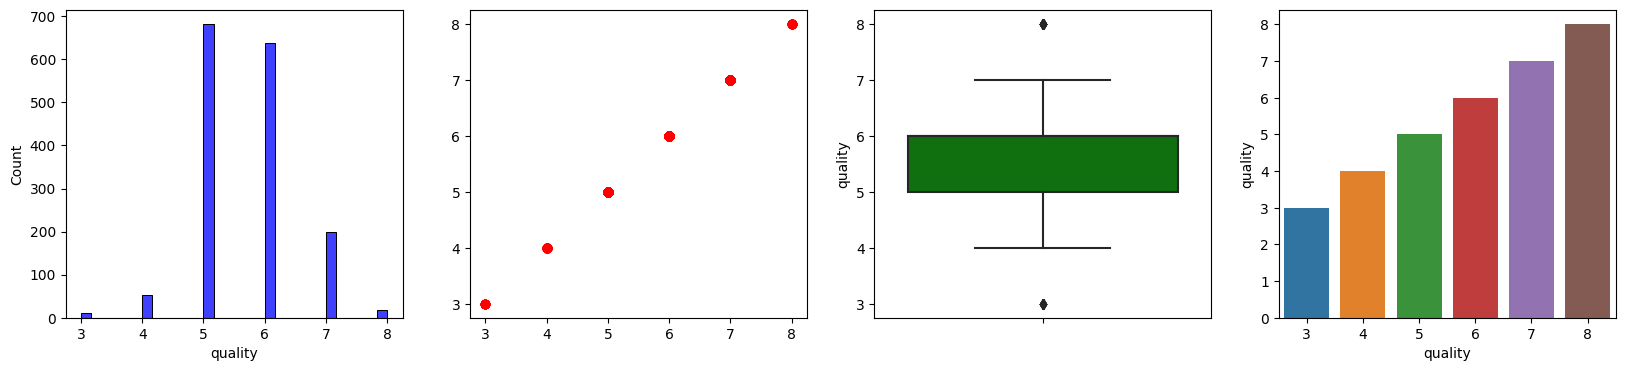

In [15]:
for variable in df:
    exploratory_analysis(df,variable,'quality')

In [16]:
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [17]:
df.iloc[detect_outliers(df,df.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,6
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6


In [18]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from feature_engine.outliers import Winsorizer

In [20]:
import feature_engine.transformation as vt

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                                     'pH', 'sulphates'])

In [21]:
windsoriser.fit(df)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['fixed acidity', 'volatile acidity', 'citric acid',
                      'residual sugar', 'chlorides', 'free sulfur dioxide',
                      'total sulfur dioxide', 'density', 'pH', 'sulphates'])

In [22]:
df = windsoriser.transform(df)

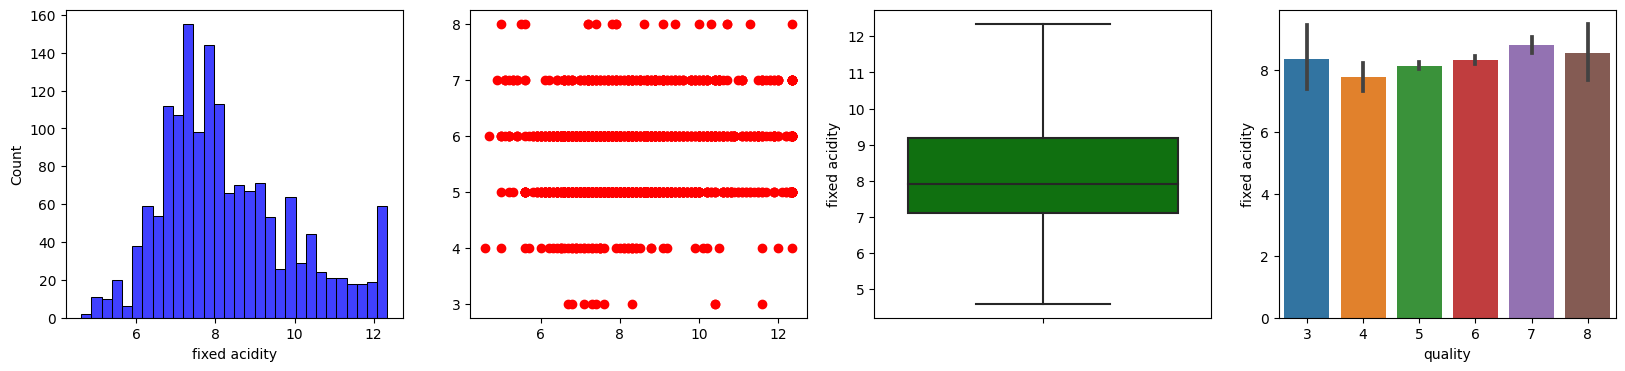

In [23]:
exploratory_analysis(df,'fixed acidity','quality')

In [24]:
#except pH
cols = ['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol']

In [25]:
lt = vt.LogTransformer(variables = cols)

lt.fit(df)

LogTransformer(variables=['fixed acidity', 'volatile acidity', 'residual sugar',
                          'chlorides', 'free sulfur dioxide',
                          'total sulfur dioxide', 'sulphates', 'alcohol'])

In [26]:
df = lt.transform(df)

In [27]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710,5
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,2.282382,5
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,2.282382,5
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,2.282382,6
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,-0.510826,0.08,0.693147,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,2.351375,5
1595,1.774952,-0.597837,0.10,0.788457,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,2.415914,6
1596,1.840550,-0.673345,0.13,0.832909,-2.577022,3.367296,3.688879,0.99574,3.42,-0.287682,2.397895,6
1597,1.774952,-0.438505,0.12,0.693147,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,2.322388,5


Feature Selection:

In [28]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate feature variables and target variable


In [29]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710,5,0
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,2.282382,5,0
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,2.282382,5,0
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,2.282382,6,0
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,-0.510826,0.08,0.693147,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,2.351375,5,0
1595,1.774952,-0.597837,0.10,0.788457,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,2.415914,6,0
1596,1.840550,-0.673345,0.13,0.832909,-2.577022,3.367296,3.688879,0.99574,3.42,-0.287682,2.397895,6,0
1597,1.774952,-0.438505,0.12,0.693147,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,2.322388,5,0


In [30]:
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [31]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [32]:
#Hence data us not balanced, since it is a classification problem we will balance the data using oversampling method
#OVERSAMPLING

!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(X,Y)


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
# See proportion of good vs bad wines
y1.value_counts()

0    1382
1    1382
Name: goodquality, dtype: int64

In [34]:
#MODELLING (Importing Necessary libraries)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [35]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((1934, 11), (830, 11))

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [37]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
dt = DecisionTreeClassifier(random_state = 42)
svm = SVC(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
lr = LogisticRegression(random_state = 42)
ab=AdaBoostClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()

In [39]:
# Define the list classifiers
classifiers = [
    ("dt" , dt),
    ("svm" , svm),
    ("rf" , rf),
    ("lr", lr),
    ("ab",ab),
    ("bc",bc),
    ("etc",etc),
    ("gbc",gbc)
    ]

In [40]:
# Dictionary to store accuracy and cross-validation scores
scores_dict = {}

for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print(f'{clf_name} score: {acc:.3f}')
    
    # Perform cross-validation and calculate the mean score
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_cv_score = cv_scores.mean()
    
    # Calculate the difference between accuracy and cross-validation score
    difference = acc - mean_cv_score
    
    # Store the results in the dictionary
    scores_dict[clf_name] = {
        'Accuracy': acc,
        'CrossValScores': cv_scores,
        'MeanCrossValScore': mean_cv_score,
        'Difference': difference
    }
    
    # Print the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Print classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    print()

# Print the results
for clf_name, results in scores_dict.items():
    print(f"{clf_name}:")
    print(f"Accuracy: {results['Accuracy']:.2f}")
    print("Cross-validation scores:", results['CrossValScores'])
    print(f"Mean Cross-validation score: {results['MeanCrossValScore']:.2f}")
    print(f"Difference between Accuracy and Cross-validation score: {results['Difference']:.2f}")
    print()


dt score: 0.904
Confusion Matrix:
[[373  53]
 [ 27 377]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       426
           1       0.88      0.93      0.90       404

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.91      0.90      0.90       830


svm score: 0.899
Confusion Matrix:
[[363  63]
 [ 21 383]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       426
           1       0.86      0.95      0.90       404

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.90      0.90      0.90       830


rf score: 0.940
Confusion Matrix:
[[385  41]
 [  9 395]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     

From the above model it is quite clear that Extra trees classifier showing the best performance with respect to others.
Now lets do hyperparameter tuning for the same.

In [41]:
parameters={'criterion':['gini','entropy'],
            'random_state':[10,50,1000],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [42]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [43]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [44]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [45]:
Final_model=ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=300,n_jobs=-2,random_state=50)
Final_model.fit(X_train,y_train)
pred=Final_model.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


95.18072289156626


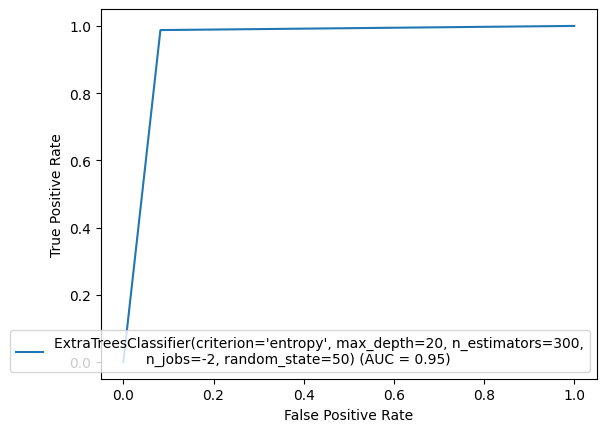

In [46]:
#ROC/AUC Curve
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [47]:
#Saving the MODEL
#saving the model using.pkl
import joblib
joblib.dump(Final_model,"WIneQuality.pkl")


['WIneQuality.pkl']

In [48]:
#lets load the saved model and get the predictions
model=joblib.load("WIneQuality.pkl")
#prediction
prediction=model.predict(X_test)
prediction

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,

In [49]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
825,1,1
826,0,0
827,1,1
828,0,0
